In [1]:
from datasets import load_dataset

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")

C:\Users\MAY02\anaconda3\envs\Python3_10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
minds[0]

{'path': 'C:\\Users\\MAY02\\.cache\\huggingface\\datasets\\downloads\\extracted\\fb3f8d4ddb2821e105f2e3d41cc1427d41e92bd6ecedc981f0cd54ae62c5745c\\en-AU~PAY_BILL\\response_4.wav',
 'audio': {'path': 'C:\\Users\\MAY02\\.cache\\huggingface\\datasets\\downloads\\extracted\\fb3f8d4ddb2821e105f2e3d41cc1427d41e92bd6ecedc981f0cd54ae62c5745c\\en-AU~PAY_BILL\\response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

In [5]:
from transformers import pipeline

classifier = pipeline(
    "audio-classification",
    model="anton-l/xtreme_s_xlsr_300m_minds14",
    device =0
)

Some weights of the model checkpoint at anton-l/xtreme_s_xlsr_300m_minds14 were not used when initializing Wav2Vec2ForSequenceClassification: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at anton-l/xtreme_s_xlsr_300m_minds14 and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos

In [7]:
classifier(minds[0]["audio"])

C:\Users\MAY02\anaconda3\envs\Python3_10\lib\site-packages\transformers\models\wav2vec2\modeling_wav2vec2.py:862: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


[{'score': 0.9611926674842834, 'label': 'pay_bill'},
 {'score': 0.029606293886899948, 'label': 'freeze'},
 {'score': 0.00355123751796782, 'label': 'card_issues'},
 {'score': 0.0021328101865947247, 'label': 'abroad'},
 {'score': 0.0008830743026919663, 'label': 'high_value_payment'}]

In [3]:
import torch


In [4]:
 torch.cuda.is_available()

True

In [10]:
speech_commands = load_dataset(
    "speech_commands", "v0.02", split="validation", streaming=True,trust_remote_code=True
)
sample = next(iter(speech_commands))

In [12]:
classifier = pipeline(
    "audio-classification", model="MIT/ast-finetuned-speech-commands-v2"
)
classifier(sample["audio"].copy())

C:\Users\MAY02\anaconda3\envs\Python3_10\lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MAY02\.cache\huggingface\hub\models--MIT--ast-finetuned-speech-commands-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument

[{'score': 0.9999892711639404, 'label': 'backward'},
 {'score': 1.7504938796264469e-06, 'label': 'happy'},
 {'score': 6.703033363919531e-07, 'label': 'follow'},
 {'score': 5.805895852972753e-07, 'label': 'stop'},
 {'score': 5.614552378574444e-07, 'label': 'up'}]

In [28]:
from IPython.display import Audio

Audio(sample["audio"]["array"], rate=sample["audio"]["sampling_rate"])

In [24]:
audio

{'path': 'backward/0d82fd99_nohash_2.wav',
 'array': array([-9.15527344e-05,  6.10351562e-05,  6.10351562e-05, ...,
         2.68859863e-02,  1.46179199e-02,  1.67846680e-03]),
 'sampling_rate': 16000}

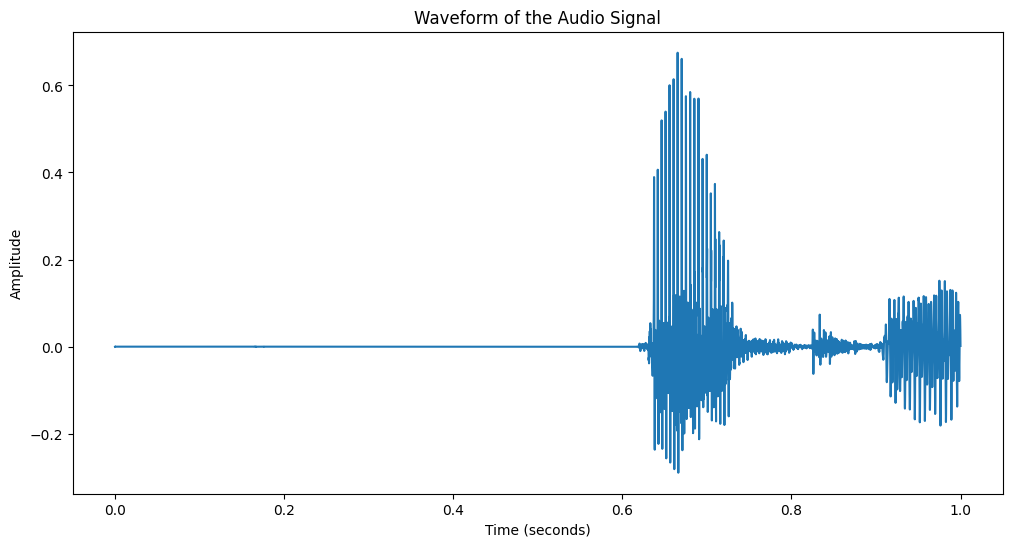

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the audio data and sampling rate
audio_data = sound
sampling_rate = audio["sampling_rate"]

# Create a time axis in seconds
time_axis = np.linspace(0, len(audio_data) / sampling_rate, num=len(audio_data))

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(time_axis, audio_data)
plt.title("Waveform of the Audio Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


In [30]:
gtzan = load_dataset("marsyas/gtzan", "all",trust_remote_code=True)
gtzan

Generating train split: 999 examples [00:00, 3978.75 examples/s]


DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 999
    })
})